In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv(r'D:\data_for_lr.csv')

In [45]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [47]:
data.isnull().sum()

x    0
y    1
dtype: int64

## Data Processing

In [48]:
data = data.dropna()
print('Shape: ', data.shape)

Shape:  (699, 2)


In [49]:
# Training data
train_X = np.array(data.x[:500]).reshape(500,1)
train_y = np.array(data.y[:500]).reshape(500,1)

# Validation data
test_X = np.array(data.x[500:]).reshape(199,1)
test_y = np.array(data.y[500:]).reshape(199,1)

In [50]:
print('training data shape: ', train_X.shape)
print('training output shape: ', train_y.shape)
print('test data shape: ', test_X.shape)
print('test output shape: ', test_y.shape)

training data shape:  (500, 1)
training output shape:  (500, 1)
test data shape:  (199, 1)
test output shape:  (199, 1)


## Linear Regression

f(x) = m*x + c

In [51]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    
    predictions = np.multiply(m, train_input) + c
    
    return predictions

## Cost Function

summation (( y - f(x) )^2) / 2n )

In [52]:
def cost_function(predictions, train_output):
    
    cost = np.mean((train_output - predictions) ** 2) / 2
    return cost

## Gradient Descent for Backpropagation

In [53]:
def backward_propagation(train_input, train_output, predictions):
    
    derivatives = dict()
    
    df = predictions - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

## Update the Parameters

In [54]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    
    return parameters

## Model Training

In [55]:
def train(train_input, train_output, learning_rate, iters):
    
    # random parameters
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)
    
    plt.figure()
    
    # loss
    loss = list()
    
    # iteration
    for i in range(iters):
        
        # forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        # cost
        cost = cost_function(predictions, train_output)
        loss.append(cost)
        print(f'Iteration: {i + 1}, Loss: {cost}')
        
        # plot
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label = 'original')
        ax.plot(train_input, predictions, '*', label = 'Predicted')
        
        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+', label = 'original')
        plt.plot(train_input, predictions, '*', label = 'Predicted')
        plt.show()
        
        
        # backpropagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        # update the parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

Iteration: 1, Loss: 55.99987526047146


<Figure size 432x288 with 0 Axes>

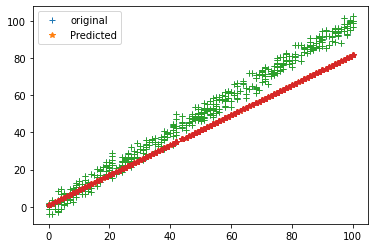

Iteration: 2, Loss: 27.602499456413426


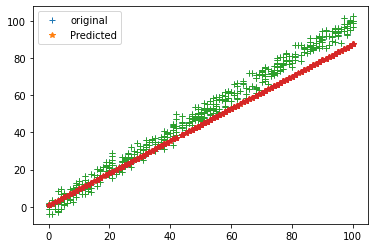

Iteration: 3, Loss: 14.718575624531244


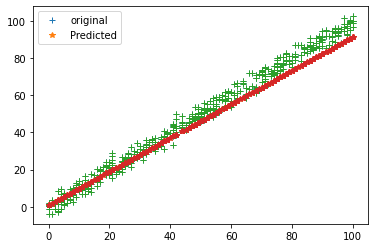

Iteration: 4, Loss: 8.873122135914022


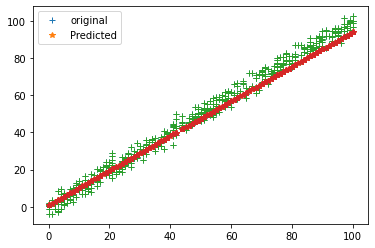

Iteration: 5, Loss: 6.221030438285746


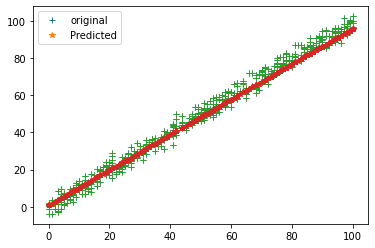

Iteration: 6, Loss: 5.017770522478193


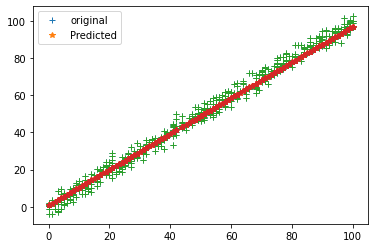

Iteration: 7, Loss: 4.471847191018349


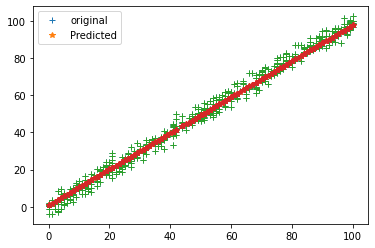

Iteration: 8, Loss: 4.224158196120003


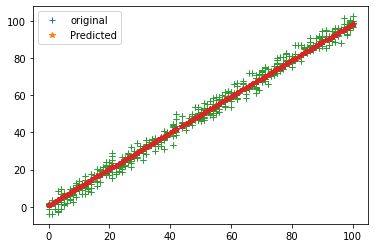

Iteration: 9, Loss: 4.111778450206103


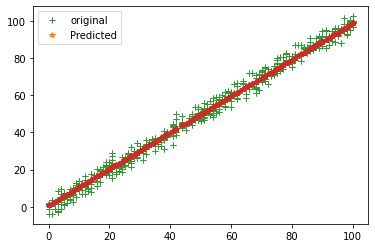

Iteration: 10, Loss: 4.060788660580387


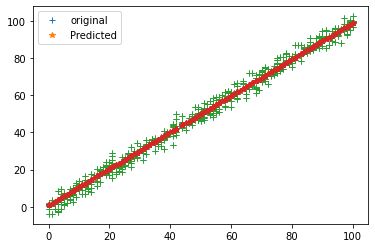

Iteration: 11, Loss: 4.0376515622704945


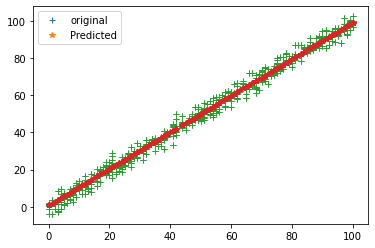

Iteration: 12, Loss: 4.0271512610112055


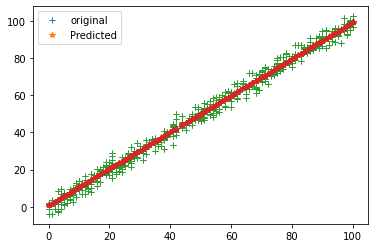

Iteration: 13, Loss: 4.022384288720631


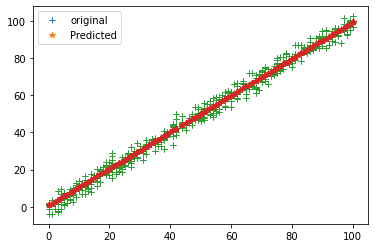

Iteration: 14, Loss: 4.02021853428344


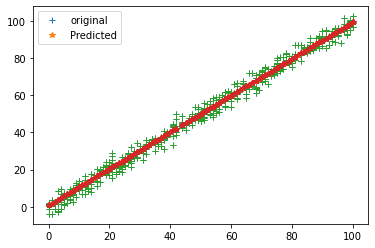

Iteration: 15, Loss: 4.0192329554173485


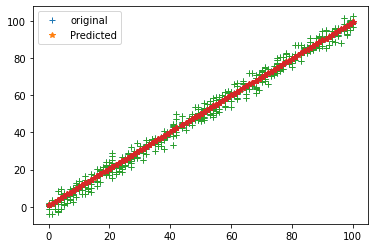

Iteration: 16, Loss: 4.01878282366487


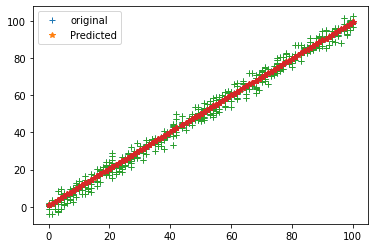

Iteration: 17, Loss: 4.018575625010708


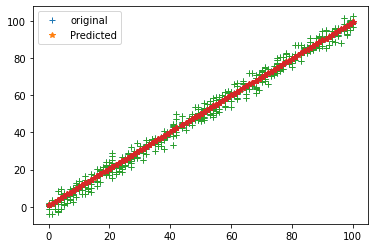

Iteration: 18, Loss: 4.018478645522113


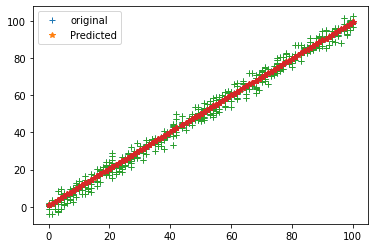

Iteration: 19, Loss: 4.01843167274079


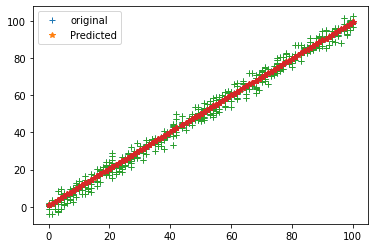

Iteration: 20, Loss: 4.018407388207709


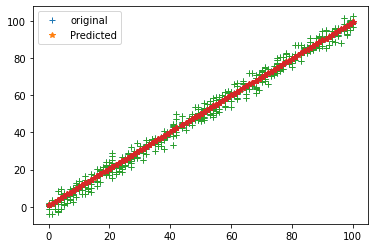

In [56]:
parameters , loss = train(train_X, train_y, 0.0001, 20)

In [57]:
print(parameters)

{'m': 0.9869115523229746, 'c': 0.690029118250649}


In [58]:
# printing the losses at last 5 iteration
print(loss[-5:])

[4.01878282366487, 4.018575625010708, 4.018478645522113, 4.01843167274079, 4.018407388207709]


Text(0, 0.5, 'Losses')

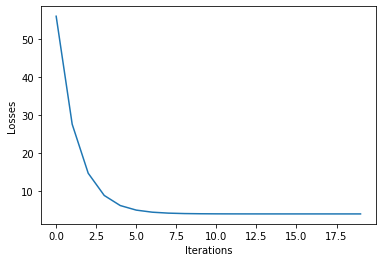

In [59]:
plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Losses')

## Making Predictions

In [60]:
test_predictions = test_y * parameters['m'] + parameters['c']

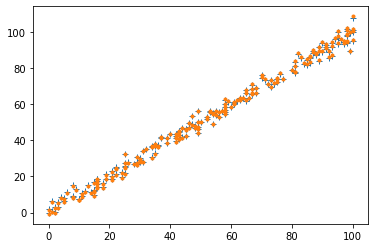

In [66]:
plt.plot(test_X, test_predictions, '+')
plt.plot(test_X, test_y, '.')
plt.show()

## Cost of Prediction

In [62]:
cost_function(test_y, test_predictions)

0.07528923746430306